In [ ]:
pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
import ssl
import requests

ssl._create_default_https_context = ssl._create_unverified_context
response = requests.get("https://www.astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5",verify=False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.astro.utoronto.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN
from astroNN.datasets import load_galaxy10sdss
from astroNN.datasets.galaxy10sdss import galaxy10cls_lookup, galaxy10_confusion

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import argparse
import cv2
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
images, labels = load_galaxy10sdss()

Galaxy10.h5: 100%|█████████▉| 210M/210M [00:08<00:00, 32.7MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:09, 22.1MB/s]                           


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=0, stratify=labels)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=0, stratify=y_test)

In [ ]:
train_freqs = [0,0,0,0,0,0,0,0,0,0]
counter = 0

for current_label in y_train:
  train_freqs[current_label] = train_freqs[current_label] + 1

In [ ]:
train_freqs

[2423, 4898, 4404, 244, 1074, 12, 412, 785, 634, 363]

In [ ]:
test_freqs = [0,0,0,0,0,0,0,0,0,0]
counter = 0

for current_label in y_test:
  test_freqs[current_label] = test_freqs[current_label] + 1

In [ ]:
test_freqs

[519, 1049, 944, 52, 230, 3, 89, 168, 136, 78]

In [ ]:
val_freqs = [0,0,0,0,0,0,0,0,0,0]
counter = 0

for current_label in y_val:
  val_freqs[current_label] = val_freqs[current_label] + 1

In [ ]:
val_freqs

[519, 1050, 944, 53, 230, 2, 88, 168, 136, 78]

Data Augmentation on Train

In [ ]:
class5Images = []

for i in range(len(X_train)):
  if(y_train[i] == 5):
    class5Images.append(X_train[i])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        # width_shift_range=0.2, height_shift_range=0.2)

# aug_iter = datagen.flow(class5Images, batch_size=1)

generated_images = []
for i in range(len(class5Images)):
  original_image = class5Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(30):
    image = next(aug_iter)[0].astype('uint8')
    generated_images.append(image)

In [ ]:
class3Images = []

for i in range(len(X_train)):
  if(y_train[i] == 3):
    class3Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class3_images = []
for i in range(len(class3Images)):
  original_image = class3Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class3_images.append(image)

In [ ]:
class6Images = []

for i in range(len(X_train)):
  if(y_train[i] == 6):
    class6Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class6_images = []
for i in range(len(class6Images)):
  original_image = class6Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class6_images.append(image)

In [ ]:
class9Images = []

for i in range(len(X_train)):
  if(y_train[i] == 9):
    class9Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class9_images = []
for i in range(len(class9Images)):
  original_image = class9Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class9_images.append(image)

In [ ]:
class8Images = []

for i in range(len(X_train)):
  if(y_train[i] == 8):
    class8Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class8_images = []
for i in range(len(class8Images)):
  original_image = class8Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class8_images.append(image)

In [ ]:
class4Images = []

for i in range(len(X_train)):
  if(y_train[i] == 4):
    class4Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class4_images = []
for i in range(len(class4Images)):
  original_image = class4Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class4_images.append(image)

In [ ]:
class0Images = []

for i in range(len(X_train)):
  if(y_train[i] == 0):
    class0Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class0_images = []
for i in range(len(class0Images)):
  original_image = class0Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class0_images.append(image)

In [ ]:
class7Images = []

for i in range(len(X_train)):
  if(y_train[i] == 7):
    class7Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class7_images = []
for i in range(len(class7Images)):
  original_image = class7Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class7_images.append(image)

In [ ]:
updated_train_images = np.concatenate((X_train, generated_images, generated_class3_images, generated_class6_images, generated_class9_images, generated_class8_images, generated_class7_images, generated_class0_images, generated_class4_images), axis=0)

In [ ]:
new_train_labels = []

for i in range(len(generated_images)):
  new_train_labels.append(5)

for i in range(len(generated_class3_images)):
  new_train_labels.append(3)

for i in range(len(generated_class6_images)):
  new_train_labels.append(6)

for i in range(len(generated_class9_images)):
  new_train_labels.append(9)

for i in range(len(generated_class8_images)):
  new_train_labels.append(8)

for i in range(len(generated_class7_images)):
  new_train_labels.append(7)

for i in range(len(generated_class0_images)):
  new_train_labels.append(0)

for i in range(len(generated_class4_images)):
  new_train_labels.append(4)

In [ ]:
y_train = np.append(y_train, new_train_labels)

In [ ]:
X_train = updated_train_images
X_train.shape

(29209, 69, 69, 3)

In [ ]:
y_train.shape

(29209,)

In [ ]:
resized_images = []
for image in X_train:
    resized_image = cv2.resize(image, (75, 75))
    resized_images.append(resized_image)
X_train_resized = resized_images

In [ ]:
X_train_resized[0].shape

(75, 75, 3)

Data Augmentation on Val

In [ ]:
class5Images = []

for i in range(len(X_val)):
  if(y_val[i] == 5):
    class5Images.append(X_val[i])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        # width_shift_range=0.2, height_shift_range=0.2)

# aug_iter = datagen.flow(class5Images, batch_size=1)

generated_images = []
for i in range(len(class5Images)):
  original_image = class5Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(30):
    image = next(aug_iter)[0].astype('uint8')
    generated_images.append(image)

In [ ]:
class3Images = []

for i in range(len(X_val)):
  if(y_val[i] == 3):
    class3Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class3_images = []
for i in range(len(class3Images)):
  original_image = class3Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class3_images.append(image)

In [ ]:
class6Images = []

for i in range(len(X_val)):
  if(y_val[i] == 6):
    class6Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class6_images = []
for i in range(len(class6Images)):
  original_image = class6Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class6_images.append(image)

In [ ]:
class9Images = []

for i in range(len(X_val)):
  if(y_val[i] == 9):
    class9Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class9_images = []
for i in range(len(class9Images)):
  original_image = class9Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class9_images.append(image)

In [ ]:
class8Images = []

for i in range(len(X_val)):
  if(y_val[i] == 8):
    class8Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class8_images = []
for i in range(len(class8Images)):
  original_image = class8Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class8_images.append(image)

In [ ]:
class4Images = []

for i in range(len(X_val)):
  if(y_val[i] == 4):
    class4Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class4_images = []
for i in range(len(class4Images)):
  original_image = class4Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class4_images.append(image)

In [ ]:
class0Images = []

for i in range(len(X_val)):
  if(y_val[i] == 0):
    class0Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class0_images = []
for i in range(len(class0Images)):
  original_image = class0Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class0_images.append(image)

In [ ]:
class7Images = []

for i in range(len(X_val)):
  if(y_val[i] == 7):
    class7Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class7_images = []
for i in range(len(class7Images)):
  original_image = class7Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class7_images.append(image)

In [ ]:
updated_val_images = np.concatenate((X_val, generated_images, generated_class3_images, generated_class6_images, generated_class9_images, generated_class8_images, generated_class7_images, generated_class0_images, generated_class4_images), axis=0)

In [ ]:
new_val_labels = []

for i in range(len(generated_images)):
  new_val_labels.append(5)

for i in range(len(generated_class3_images)):
  new_val_labels.append(3)

for i in range(len(generated_class6_images)):
  new_val_labels.append(6)

for i in range(len(generated_class9_images)):
  new_val_labels.append(9)

for i in range(len(generated_class8_images)):
  new_val_labels.append(8)

for i in range(len(generated_class7_images)):
  new_val_labels.append(7)

for i in range(len(generated_class0_images)):
  new_val_labels.append(0)

for i in range(len(generated_class4_images)):
  new_val_labels.append(4)

In [ ]:
y_val = np.append(y_val, new_val_labels)

In [ ]:
X_val = updated_val_images
X_val.shape

(6243, 69, 69, 3)

In [ ]:
y_val.shape

(6243,)

In [ ]:
resized_images = []
for image in X_val:
    resized_image = cv2.resize(image, (75, 75))
    resized_images.append(resized_image)
X_val_resized = resized_images

In [ ]:
X_val_resized[0].shape

(75, 75, 3)

Data Augmentation in Test

In [ ]:
class5Images = []

for i in range(len(X_test)):
  if(y_test[i] == 5):
    class5Images.append(X_test[i])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        # width_shift_range=0.2, height_shift_range=0.2)

# aug_iter = datagen.flow(class5Images, batch_size=1)

generated_images = []
for i in range(len(class5Images)):
  original_image = class5Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(30):
    image = next(aug_iter)[0].astype('uint8')
    generated_images.append(image)

In [ ]:
class3Images = []

for i in range(len(X_test)):
  if(y_test[i] == 3):
    class3Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class3_images = []
for i in range(len(class3Images)):
  original_image = class3Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class3_images.append(image)

In [ ]:
class6Images = []

for i in range(len(X_test)):
  if(y_test[i] == 6):
    class6Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class6_images = []
for i in range(len(class6Images)):
  original_image = class6Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class6_images.append(image)

In [ ]:
class9Images = []

for i in range(len(X_test)):
  if(y_test[i] == 9):
    class9Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class9_images = []
for i in range(len(class9Images)):
  original_image = class9Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class9_images.append(image)

In [ ]:
class8Images = []

for i in range(len(X_test)):
  if(y_test[i] == 8):
    class8Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class8_images = []
for i in range(len(class8Images)):
  original_image = class8Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class8_images.append(image)

In [ ]:
class4Images = []

for i in range(len(X_test)):
  if(y_test[i] == 4):
    class4Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class4_images = []
for i in range(len(class4Images)):
  original_image = class4Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class4_images.append(image)

In [ ]:
class0Images = []

for i in range(len(X_test)):
  if(y_test[i] == 0):
    class0Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class0_images = []
for i in range(len(class0Images)):
  original_image = class0Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class0_images.append(image)

In [ ]:
class7Images = []

for i in range(len(X_test)):
  if(y_test[i] == 7):
    class7Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class7_images = []
for i in range(len(class7Images)):
  original_image = class7Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class7_images.append(image)

In [ ]:
updated_test_images = np.concatenate((X_test, generated_images, generated_class3_images, generated_class6_images, generated_class9_images, generated_class8_images, generated_class7_images, generated_class0_images, generated_class4_images), axis=0)

In [ ]:
new_test_labels = []

for i in range(len(generated_images)):
  new_test_labels.append(5)

for i in range(len(generated_class3_images)):
  new_test_labels.append(3)

for i in range(len(generated_class6_images)):
  new_test_labels.append(6)

for i in range(len(generated_class9_images)):
  new_test_labels.append(9)

for i in range(len(generated_class8_images)):
  new_test_labels.append(8)

for i in range(len(generated_class7_images)):
  new_test_labels.append(7)

for i in range(len(generated_class0_images)):
  new_test_labels.append(0)

for i in range(len(generated_class4_images)):
  new_test_labels.append(4)

In [ ]:
y_test = np.append(y_test, new_test_labels)

In [ ]:
X_test = updated_test_images
X_test.shape

(6273, 69, 69, 3)

In [ ]:
y_test.shape

(6273,)

In [ ]:
resized_images = []
for image in X_test:
    resized_image = cv2.resize(image, (75, 75))
    resized_images.append(resized_image)
X_test_resized = resized_images

In [ ]:
X_train_resized

[array([[[ 7,  6,  4],
         [ 9,  8,  6],
         [11, 10,  8],
         ...,
         [ 1,  0,  0],
         [ 2,  1,  0],
         [ 5,  4,  2]],
 
        [[ 3,  2,  1],
         [ 7,  6,  4],
         [ 9,  8,  6],
         ...,
         [ 2,  1,  0],
         [ 3,  2,  1],
         [ 7,  6,  4]],
 
        [[ 3,  2,  0],
         [ 2,  1,  1],
         [ 5,  4,  2],
         ...,
         [ 1,  0,  0],
         [ 2,  1,  0],
         [ 5,  4,  2]],
 
        ...,
 
        [[ 4,  4,  2],
         [ 2,  2,  1],
         [ 1,  1,  0],
         ...,
         [ 5,  4,  2],
         [ 6,  4,  2],
         [ 3,  2,  1]],
 
        [[ 4,  4,  2],
         [ 1,  1,  0],
         [ 1,  1,  0],
         ...,
         [ 3,  2,  0],
         [ 5,  4,  2],
         [ 5,  5,  3]],
 
        [[ 1,  1,  0],
         [ 1,  1,  0],
         [ 2,  2,  1],
         ...,
         [ 3,  2,  1],
         [ 9,  8,  6],
         [10,  9,  7]]], dtype=uint8),
 array([[[ 6,  8,  5],
         [ 8, 10,  

In [ ]:
X_test_resized[0].shape

(75, 75, 3)

Range scaling and Target matrix creation

In [ ]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)
X_val_resized = np.array(X_val_resized)

In [ ]:
y_train = y_train.astype(np.float32)
y_train = to_categorical(y_train)
X_train = X_train.astype(np.float32)
X_train = X_train/255
X_train_resized = X_train_resized.astype(np.float32)
X_train_resized = X_train_resized/255

In [ ]:
y_test = y_test.astype(np.float32)
y_test = to_categorical(y_test)
X_test = X_test.astype(np.float32)
X_test = X_test/255
X_test_resized = X_test_resized.astype(np.float32)
X_test_resized = X_test_resized/255

In [ ]:
y_val = y_val.astype(np.float32)
y_val = to_categorical(y_val)
X_val = X_val.astype(np.float32)
X_val = X_val/255
X_val_resized = X_val_resized.astype(np.float32)
X_val_resized = X_val_resized/255

Conerting images to grayscale and applying morphology opening

In [ ]:
pre_processed_images = []

for i in range(len(X_train)):
  gray = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_train = np.array(pre_processed_images)

In [ ]:
X_train.shape

(29209, 69, 69, 3)

In [ ]:
y_train.shape

(29209, 10)

In [ ]:
pre_processed_images = []

for i in range(len(X_test)):
  gray = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_test = np.array(pre_processed_images)

In [ ]:
X_test.shape

(6273, 69, 69, 3)

In [ ]:
y_test.shape

(6273, 10)

In [ ]:
pre_processed_images = []

for i in range(len(X_val)):
  gray = cv2.cvtColor(X_val[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_val = np.array(pre_processed_images)

In [ ]:
X_val.shape

(6243, 69, 69, 3)

In [ ]:
y_val.shape

(6243, 10)

In [ ]:
pre_processed_images = []

for i in range(len(X_train_resized)):
  gray = cv2.cvtColor(X_train_resized[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_train_resized = np.array(pre_processed_images)

In [ ]:
X_train_resized.shape

(29209, 75, 75, 3)

In [ ]:
pre_processed_images = []

for i in range(len(X_test_resized)):
  gray = cv2.cvtColor(X_test_resized[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_test_resized = np.array(pre_processed_images)

In [ ]:
X_test_resized.shape

(6273, 75, 75, 3)

In [ ]:
pre_processed_images = []

for i in range(len(X_val_resized)):
  gray = cv2.cvtColor(X_val_resized[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_val_resized = np.array(pre_processed_images)

In [ ]:
X_val_resized.shape

(6243, 75, 75, 3)

**PCA**

In [ ]:
X_train_resized

[array([[[ 7,  6,  4],
         [ 9,  8,  6],
         [11, 10,  8],
         ...,
         [ 1,  0,  0],
         [ 2,  1,  0],
         [ 5,  4,  2]],
 
        [[ 3,  2,  1],
         [ 7,  6,  4],
         [ 9,  8,  6],
         ...,
         [ 2,  1,  0],
         [ 3,  2,  1],
         [ 7,  6,  4]],
 
        [[ 3,  2,  0],
         [ 2,  1,  1],
         [ 5,  4,  2],
         ...,
         [ 1,  0,  0],
         [ 2,  1,  0],
         [ 5,  4,  2]],
 
        ...,
 
        [[ 4,  4,  2],
         [ 2,  2,  1],
         [ 1,  1,  0],
         ...,
         [ 5,  4,  2],
         [ 6,  4,  2],
         [ 3,  2,  1]],
 
        [[ 4,  4,  2],
         [ 1,  1,  0],
         [ 1,  1,  0],
         ...,
         [ 3,  2,  0],
         [ 5,  4,  2],
         [ 5,  5,  3]],
 
        [[ 1,  1,  0],
         [ 1,  1,  0],
         [ 2,  2,  1],
         ...,
         [ 3,  2,  1],
         [ 9,  8,  6],
         [10,  9,  7]]], dtype=uint8),
 array([[[ 6,  8,  5],
         [ 8, 10,  

In [ ]:

from sklearn.decomposition import PCA
no_components = 60
x, h, w, d = X_train_resized.shape
reconstructed_x_train = X_train_resized.reshape(x, h*w*d)
pca = PCA(n_components=no_components).fit(reconstructed_x_train)

AttributeError: ignored

In [ ]:
for i in range(no_components):
  print('Percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

print('Total variance explained by {} PCs: {}'.format(no_components, np.sum(pca.explained_variance_ratio_)))

Percentage of variance explained by PC 1: 0.5736352801322937
Percentage of variance explained by PC 2: 0.06525097042322159
Percentage of variance explained by PC 3: 0.06415290385484695
Percentage of variance explained by PC 4: 0.04249479994177818
Percentage of variance explained by PC 5: 0.023314405232667923
Percentage of variance explained by PC 6: 0.019092723727226257
Percentage of variance explained by PC 7: 0.015911463648080826
Percentage of variance explained by PC 8: 0.012372034601867199
Percentage of variance explained by PC 9: 0.01215600036084652
Percentage of variance explained by PC 10: 0.01060857530683279
Percentage of variance explained by PC 11: 0.009554652497172356
Percentage of variance explained by PC 12: 0.008457614108920097
Percentage of variance explained by PC 13: 0.00747010437771678
Percentage of variance explained by PC 14: 0.006328340619802475
Percentage of variance explained by PC 15: 0.005280320066958666
Percentage of variance explained by PC 16: 0.005071733612

Text(0, 0.5, 'Fraction of totalvariance explained')

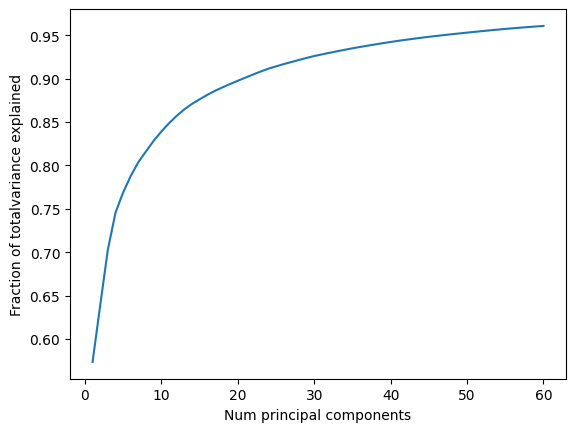

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import random

fract_variance = []
total_sum = 0

for i in range(no_components):
  total_sum+=pca.explained_variance_ratio_[i]
  fract_variance.append(total_sum)

fract_variance


rng = range(1,no_components+1)
plt.plot(rng, fract_variance)
plt.xlabel('Num principal components')
plt.ylabel('Fraction of totalvariance explained')

In [ ]:
X_train_resized.shape[1]

75

In [ ]:
selected_no_components = 20
pca = PCA(n_components=selected_no_components).fit(reconstructed_x_train)

In [ ]:
X_train_pca = pca.transform(reconstructed_x_train)
x, h, w, d = X_test_resized.shape
reconstructed_x_test = X_test_resized.reshape(x, h*w*d)
X_test_pca = pca.transform(reconstructed_x_test)

x, h, w, d = X_val_resized.shape
reconstructed_x_val = X_val_resized.reshape(x, h*w*d)
X_val_pca = pca.transform(reconstructed_x_val)

**K Nearest Neighbors**

In [ ]:
from sklearn.metrics import classification_report
# K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [ ]:
numNeighbors = range(5 , 20, 2)
trainAcc = []
valAcc = []
for k in numNeighbors:
  clf = KNeighborsClassifier(n_neighbors=k, weights= 'distance', metric='minkowski') 
  clf.fit(X=X_train_pca, y=y_train)
  Y_predTrain = clf.predict(X_train_pca)
  Y_predVal = clf.predict(X_val_pca)
  trainAcc.append(accuracy_score(y_train, Y_predTrain))
  valAcc.append(accuracy_score(y_val, Y_predVal))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, valAcc,'bv--')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

ValueError: ignored

In [ ]:

model = KNeighborsClassifier(n_neighbors=7,  metric='minkowski', p=1, weights= 'distance') # weights= 'distance'
model.fit(X=X_train_pca, y=y_train)

knn_y_pred = model.predict(X_test_pca)
print('Accuracy by K nearest neighbours is %.2f' % (accuracy_score(y_test, knn_y_pred)))

Accuracy by K nearest neighbours is 0.49


In [ ]:
len(labels)

21785

**Decision Tree**

In [ ]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree = dtree.fit(X_train_pca, y_train)

In [ ]:
dtree_y_pred = dtree.predict(X_test_pca)
print('Accuracy on test data for decision tree is %.2f' % (accuracy_score(dtree_y_pred, y_test)))

Accuracy on test data for decision tree is 0.43


In [ ]:
print('Classification report for Decison Tree :: ')
print(classification_report(y_test, dtree_y_pred)) # are target labels needed?

Classification report for Decison Tree :: 
              precision    recall  f1-score   support

           0       0.51      0.35      0.41      1557
           1       0.80      0.78      0.79      1049
           2       0.70      0.65      0.67       944
           3       0.24      0.06      0.09       208
           4       0.57      0.54      0.56       920
           5       0.13      0.02      0.04        93
           6       0.62      0.48      0.54       356
           7       0.34      0.09      0.14       504
           8       0.18      0.01      0.03       408
           9       0.24      0.03      0.05       234

   micro avg       0.62      0.43      0.51      6273
   macro avg       0.43      0.30      0.33      6273
weighted avg       0.54      0.43      0.47      6273
 samples avg       0.43      0.43      0.43      6273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


# **Random forest**


In [ ]:
# calculate class weights for each output dimension
class_weights = []
for i in range(y_train.shape[1]):
    unique_classes, class_counts = np.unique(y_train[:, i], return_counts=True)
    class_weights_dict = {unique_classes[j]: 1 / (class_counts[j] * len(unique_classes)) 
                          for j in range(len(unique_classes))}
    class_weights.append(class_weights_dict)

# print the class weight list
print("Class Weights List: ", class_weights)

Class Weights List:  [{0.0: 2.2789425706472198e-05, 1.0: 6.878525244187646e-05}, {0.0: 2.056682160338941e-05, 1.0: 0.00010208248264597796}, {0.0: 2.0157226365652087e-05, 1.0: 0.00011353315168029064}, {0.0: 1.7709772252328836e-05, 1.0: 0.0005122950819672131}, {0.0: 2.006984305382732e-05, 1.0: 0.00011638733705772812}, {0.0: 1.733883552380622e-05, 1.0: 0.0013440860215053765}, {0.0: 1.8141576865861182e-05, 1.0: 0.00030339805825242716}, {0.0: 1.861920011916288e-05, 1.0: 0.00021231422505307856}, {0.0: 1.8310323360310542e-05, 1.0: 0.0002628811777076761}, {0.0: 1.7780938833570414e-05, 1.0: 0.0004591368227731864}]


In [ ]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

# class_w = {0: 3.6131062227729313, 1: 2.1071259797563466, 2: 1.4638128400856872, 3: 1.9044044641110382, 4: 11.748073700758832, 5: 1.8902585268288075, 6: 2.116051072272762, 7: 1.4540255474458956, 8: 2.6819386001354475, 9: 2.041202916832984}

RF_pred = ensemble.RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = 'sqrt', max_depth = 40, class_weight=class_weights)
# RF_pred = ensemble.RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = 'sqrt')
#train RF model
RF_pred.fit(X_train_pca, y_train)

#predict accuracy for test set
rf_y_testPred = RF_pred.predict(X_test_pca)
print('Accuracy on test data for random forest is %2f ' % (accuracy_score(rf_y_testPred, y_test)))

Accuracy on test data for random forest is 0.361868 


# ***Extra Randomized Tree***

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.datasets import make_regression, make_classification

# Create an instance of the ExtraTreesRegressor
# ext_reg = ExtraTreesClassifier(n_estimators=100,  random_state=0)
# ext_reg = ExtraTreesClassifier(n_estimators=100, criterion="absolute_error", random_state=0)
# ext_reg = ExtraTreesClassifier(n_estimators=100,criterion = "absolute_error",  max_features="sqrt", max_depth = 40, random_state=30)
ext_reg = ExtraTreesClassifier(n_estimators=100,  max_features="sqrt", max_depth = 40, random_state=30)

# Fit the model to the training data
ext_reg.fit(X_train_pca, y_train)

# Predict the target variable for the testing set
ext_y_pred = ext_reg.predict(X_test_pca)

# print('Accuracy on test data for extra randomized tree is %2f ' % (accuracy_score(ext_y_pred, y_test)))
# Calculate the R-squared score for the model
score = ext_reg.score(X_test_pca, y_test)
print('Accuracy score: {:.2f}'.format(score))

# # Predict the probabilities for each class
# y_pred_prob = ext_reg.predict_proba(X_test_pca)

# y_pred = np.zeros((len(y_pred_prob), len(ext_reg.classes_)), dtype=int)
# y_pred[np.arange(len(y_pred_prob)), np.argmax(y_pred_prob, axis=1)] = 1





Accuracy score: 0.36


In [ ]:
score = ext_reg.score(X_test_pca, y_test)
print('extra randomized tree Accuracy score: {:.2f}'.format(score))
print('Accuracy on test data for random forest is %2f ' % (accuracy_score(rf_y_testPred, y_test)))
print('Accuracy on test data for decision tree is %.2f' % (accuracy_score(dtree_y_pred, y_test)))

print('Accuracy by K nearest neighbours is %.2f' % (accuracy_score(y_test, knn_y_pred)))

In [ ]:
print('Classification report for Extra Randomized Tree :: ')
print(classification_report(y_test, ext_y_pred)) # are target labels needed?

Classification report for Extra Randomized Tree :: 
              precision    recall  f1-score   support

           0       0.63      0.21      0.32      1557
           1       0.91      0.73      0.81      1049
           2       0.91      0.56      0.69       944
           3       0.50      0.00      0.01       208
           4       0.72      0.51      0.60       920
           5       0.00      0.00      0.00        93
           6       0.86      0.38      0.53       356
           7       0.45      0.03      0.05       504
           8       0.00      0.00      0.00       408
           9       0.00      0.00      0.00       234

   micro avg       0.81      0.36      0.49      6273
   macro avg       0.50      0.24      0.30      6273
weighted avg       0.65      0.36      0.44      6273
 samples avg       0.36      0.36      0.36      6273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


In [ ]:
print('Classification report for Random Forest :: ')
print(classification_report(y_test, rf_y_testPred)) # are target labels needed?

Classification report for Random Forest :: 
              precision    recall  f1-score   support

           0       0.62      0.23      0.33      1557
           1       0.91      0.72      0.80      1049
           2       0.89      0.57      0.69       944
           3       1.00      0.00      0.01       208
           4       0.73      0.50      0.59       920
           5       0.00      0.00      0.00        93
           6       0.81      0.38      0.52       356
           7       0.48      0.08      0.13       504
           8       0.00      0.00      0.00       408
           9       0.00      0.00      0.00       234

   micro avg       0.79      0.36      0.50      6273
   macro avg       0.54      0.25      0.31      6273
weighted avg       0.66      0.36      0.45      6273
 samples avg       0.36      0.36      0.36      6273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


In [ ]:
print('Classification report for kNN :: ')
print(classification_report(y_test, knn_y_pred)) # are target labels needed?
from sklearn.metrics import ConfusionMatrixDisplay

# ConfusionMatrixDisplay.from_estimator(model, X_test_pca, y_test, display_labels="", xticks_rotation="vertical")
# plt.tight_layout()
# plt.show()

Classification report for kNN :: 
              precision    recall  f1-score   support

           0       0.56      0.38      0.45      1557
           1       0.74      0.90      0.81      1049
           2       0.72      0.71      0.72       944
           3       0.34      0.05      0.08       208
           4       0.67      0.63      0.65       920
           5       0.50      0.01      0.02        93
           6       0.65      0.51      0.57       356
           7       0.42      0.19      0.26       504
           8       0.12      0.00      0.01       408
           9       0.00      0.00      0.00       234

   micro avg       0.66      0.49      0.56      6273
   macro avg       0.47      0.34      0.36      6273
weighted avg       0.57      0.49      0.51      6273
 samples avg       0.49      0.49      0.49      6273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.


# **Previous implementation**